In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
boston = load_boston()

In [ ]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target
X = boston.data
df.sample(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
302,0.09266,34.0,6.09,0.0,0.433,6.495,18.4,5.4917,7.0,329.0,16.1,383.61,8.67,26.4
266,0.78570,20.0,3.97,0.0,0.647,7.014,84.6,2.1329,5.0,264.0,13.0,384.07,14.79,30.7
460,4.81213,0.0,18.10,0.0,0.713,6.701,90.0,2.5975,24.0,666.0,20.2,255.23,16.42,16.4
427,37.66190,0.0,18.10,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52,10.9


In [ ]:
fitur = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']
target = ['target']

In [ ]:
X = df[fitur]
Y = df[target]

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
Y

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


# Data Split


In [ ]:
df.shape

(506, 14)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(
    X,
    Y, 
    test_size = 0.2, # stratified random sampling
    random_state = 2020) # make the result consistent

In [ ]:
X_train.shape

(404, 13)

# Standardization Process

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[2.60717786e-03, 0.00000000e+00, 3.71334311e-01, ...,
        6.38297872e-01, 9.91754501e-01, 2.13576159e-01],
       [8.53962951e-04, 4.50000000e-01, 1.09237537e-01, ...,
        2.76595745e-01, 9.81869988e-01, 8.16777042e-02],
       [1.69799768e-03, 0.00000000e+00, 2.96920821e-01, ...,
        8.82978723e-01, 9.76776439e-01, 3.41059603e-01],
       ...,
       [3.77544378e-03, 0.00000000e+00, 2.53665689e-01, ...,
        7.44680851e-01, 9.85450603e-01, 2.76214128e-01],
       [1.57376981e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 1.00000000e+00, 6.60871965e-01],
       [8.99251956e-04, 6.00000000e-01, 4.50879765e-02, ...,
        6.06382979e-01, 9.88476474e-01, 1.67218543e-01]])

# Model Complexity in Ridge

In [ ]:
ridge_model = Ridge()
parameters = {'alpha':[100000,10000,1000,100,10,1,1e-1,1e-3]}
ridge_test=GridSearchCV(ridge,parameters, scoring='neg_mean_squared_error',cv=5)
ridge_test.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [100000, 10000, 1000, 100, 10, 1, 0.1,
                                   0.001]},
             scoring='neg_mean_squared_error')

In [ ]:
pred_test_ridge = ridge_test.predict(X_test_scaled)

In [ ]:
pred_test_ridge.shape 

(102, 1)

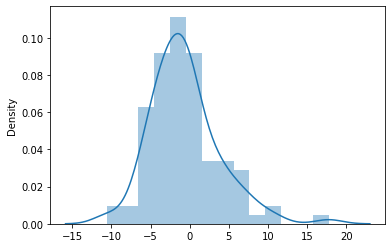

In [ ]:
sns.distplot(Y_test-pred_test_ridge)

In [ ]:
print('Alpha: ', ridge_test.best_params_)
print('Accuracy : ', ridge_test.best_score_)

Alpha:  {'alpha': 0.1}
Accuracy :  -25.75799678227317


# Model Complexity in Lasso

In [ ]:
lasso_model = Lasso()
parameters={'alpha':[100000,10000,1000,100,10,1,1e-1,1e-3]}
lasso_test = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)
lasso_test.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [100000, 10000, 1000, 100, 10, 1, 0.1,
                                   0.001]},
             scoring='neg_mean_squared_error')

In [ ]:
pred_test_lasso = lasso_test.predict(X_test_scaled)

In [ ]:
pred_test_lasso = pred_test_lasso.reshape(102,1)

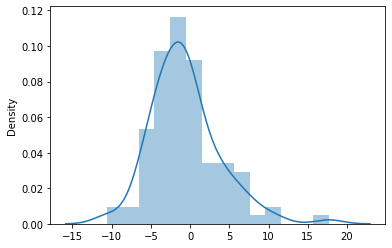

In [ ]:
sns.distplot(Y_test-pred_test_lasso)

In [ ]:
print('Alpha: ', ridge_test.best_params_)
print('Accuracy : ', ridge_test.best_score_)

Alpha:  {'alpha': 0.1}
Accuracy :  -25.75799678227317
